In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('r9nano.csv',index_col=0);data

,benchmark,numWfPerWG,numWG,time
0,empty_kernel,1,128,0.000013
1,empty_kernel,1,128,0.000014
2,empty_kernel,1,128,0.000013
3,empty_kernel,1,128,0.000014
4,empty_kernel,1,128,0.000013
5,empty_kernel,1,128,0.000014
6,empty_kernel,1,128,0.000013
7,empty_kernel,1,128,0.000014
8,empty_kernel,1,128,0.000013
9,empty_kernel,1,128,0.000014


In [70]:
grouped = data.groupby(['numWfPerWG', 'numWG']).agg(np.mean).reset_index();grouped

,numWfPerWG,numWG,time
0,1,128,0.000014
1,1,256,0.000014
2,1,384,0.000015
3,1,512,0.000015
4,1,640,0.000016
5,1,768,0.000016
6,1,896,0.000017
7,1,1024,0.000017
8,2,128,0.000014
9,2,256,0.000014


(1e-05, 3e-05)

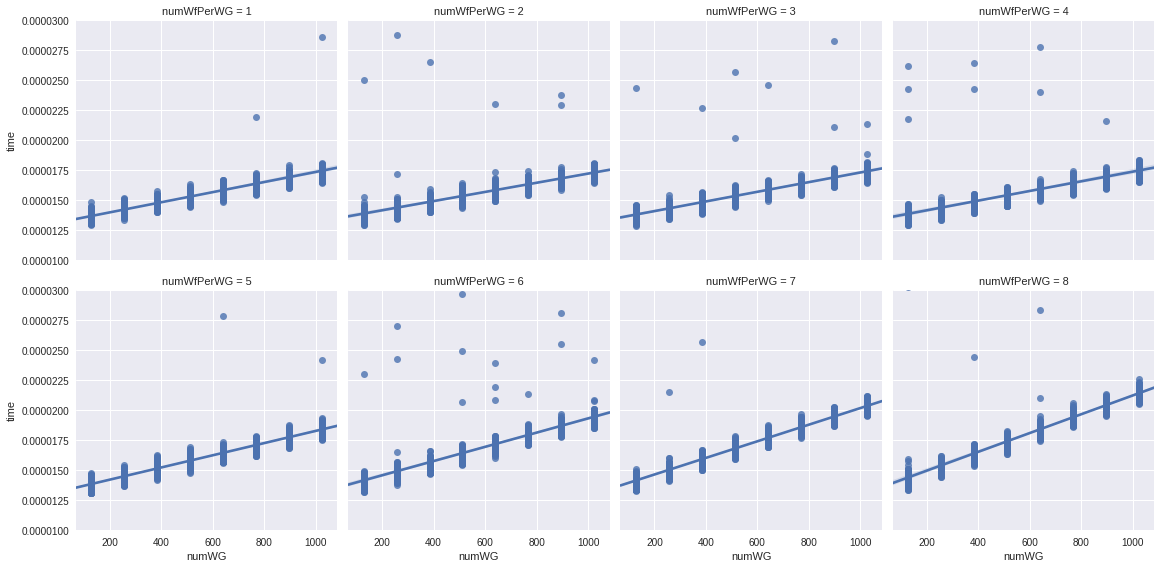

In [95]:
lm = sns.lmplot('numWG', 'time', data, col='numWfPerWG', col_wrap=4, size=4)
lm.axes[0].set_ylim(1e-5, 3e-5)

In [87]:
data_wf = grouped[grouped['numWfPerWG']==1];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.311529e-05
numWG        4.222832e-09
dtype: float64

In [88]:
data_wf = grouped[grouped['numWfPerWG']==2];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.336694e-05
numWG        3.830330e-09
dtype: float64

In [89]:
data_wf = grouped[grouped['numWfPerWG']==3];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.325670e-05
numWG        4.033386e-09
dtype: float64

In [90]:
data_wf = grouped[grouped['numWfPerWG']==4];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.332147e-05
numWG        4.037525e-09
dtype: float64

In [91]:
data_wf = grouped[grouped['numWfPerWG']==5];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.317565e-05
numWG        5.090939e-09
dtype: float64

In [92]:
data_wf = grouped[grouped['numWfPerWG']==6];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.336916e-05
numWG        5.939798e-09
dtype: float64

In [93]:
data_wf = grouped[grouped['numWfPerWG']==7];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.323406e-05
numWG        6.939300e-09
dtype: float64

In [94]:
data_wf = grouped[grouped['numWfPerWG']==8];data_wf
result = sm.ols(formula="time ~ numWG", data=data_wf).fit()
result.params

Intercept    1.337394e-05
numWG        7.849956e-09
dtype: float64

Conclusion: It takes 4 cycles to launch a workgroup if the number of wavefronts is 4 or less. If there are more than 4 wavefronts in a workgroup, it takes one more cycle per wavefront to dispatch one workgroup.